In [2]:
# !pip install tensorflow

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)


In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12806282963372238751
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6940786688
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8229374723827501161
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


## Data Augmentation Code
https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#gaussianblur

### Import Libraries

In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import random
from tqdm import tqdm

from PIL import Image
import cv2

import torch
import torchvision.transforms as T

print('torch version:', torch.__version__)

word_types = ['1', '2', '3', '4', '가구', '간섭', '개폐', '거실', '고정', '공', '과다', '기타', '누락', '단차', '대피공간', '도배', '도장', '드레스룸', '들뜸', '마감', '마감판', '면불량', '문', '미시공', '미흡', '바닥', '발코니', '벽', '부', '불량', '붙박이장', '석고', '세부위치', '세탁실', '수직수평', '스크레치', '실링', '실외기실', '안', '알', '오염', '욕실', '유격', '이격', '이음불량', '작동', '잠금', '전등', '주방', '줄눈', '찍힘', '창호', '천장', '침', '코킹', '콘센트', '타일', '태움', '틀', '틈새', '파손', '파우더', '팬트리', '현관', '확인']
ROOT_DIR = r'C:\Users\01_data\aug_original'

torch version: 1.10.0


In [2]:
# Device configuration
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('device:', device)

device: cpu


### Tick Synthesis

In [33]:
ROOT_DIR = r'C:\Users\01_data\aug_original'
original_list = os.listdir(os.path.join(ROOT_DIR,'words/'))

print('Number of original images:', len(original_list))
print('Example of file name:', original_list[0])

Number of original images: 65
Example of file name: 1.jpg


In [9]:
# white = Image.new('RGB', (1000, 1000), (255,255,255))
# white.save(os.path.join(ROOT_DIR,'white.jpg'))

In [5]:
# Circle augmentation
for i, circle_dir in enumerate(os.listdir(os.path.join(ROOT_DIR, 'tick'))):
    
    # translation, scaling by Affine transfrom
    def AffineTransform(img_dir, new_dir):
        orig_img = Image.open(img_dir)
        affine_transformer = T.RandomAffine(degrees=(0, 0), translate=(0.2, 0.2), scale=(0.5, 1.5))
        affine_imgs = [affine_transformer(orig_img) for _ in range(7)]
        for i, affine_img in enumerate(affine_imgs):
            affine_img.save(f'{new_dir}_a_{i}.png')
    
    full_dir = os.path.join(ROOT_DIR, 'tick', circle_dir)
    new_dir = os.path.join(ROOT_DIR, 'aug_tick', circle_dir[:-4])
    
    AffineTransform(full_dir, new_dir)

In [7]:
# Read image
def add_circle(word_dir):
    word = Image.open(os.path.join(ROOT_DIR, 'words', word_dir))
    
    for i, circle_dir in enumerate(os.listdir(os.path.join(ROOT_DIR, 'aug_tick'))):
        # Resize the circle image to fit circle
        word2 = word.copy()
        w, h = word2.size
        
        circle = Image.open(os.path.join(ROOT_DIR, 'aug_tick', circle_dir))
        circle2 = circle.resize((w, h))
        w2, h2 = circle2.size

#         if w >= h:
#             circle3 = circle2.crop((0, h2/2-h/2, w, h2/2+h/2))
#         else:
#             circle3 = circle2.crop((w2/2-w/2, 0, w2/2+w/2, h))
#         circle3 = circle3.resize((w, h))

        # paste circle to word image
#         im = Image.alpha_composite(word2.convert('RGBA'), circle3.convert('RGBA'))
        im = Image.alpha_composite(word2.convert('RGBA'), circle2.convert('RGBA'))
        
        # Make background white
        white = Image.open(os.path.join(ROOT_DIR, 'white.jpg'))
        white2 = white.resize(im.size)
        
        im2 = Image.alpha_composite(white2.convert('RGBA'), im)
        im2.convert('RGB').save(f'{ROOT_DIR}/aug_tick_word/{word_dir[:-4]}_{i}.jpg')
        
        
for word_dir in os.listdir(os.path.join(ROOT_DIR, 'words')):
    add_circle(word_dir)
    print(word_dir, 'is done')
print('All finished')

1.png is done
2.png is done
3.png is done
4.png is done
가구.png is done
간섭.png is done
개폐.png is done
거실.png is done
고정.png is done
공.png is done
과다.png is done
기타.png is done
누락.png is done
단차.png is done
대피공간.png is done
도배.png is done
도장.png is done
드레스룸.png is done
들뜸.png is done
마감.png is done
마감판.png is done
면불량.png is done
문.png is done
미시공.png is done
미흡.png is done
바닥.png is done
발코니.png is done
벽.png is done
부.png is done
불량.png is done
붙박이장.png is done
석고.png is done
세부위치.png is done
세탁실.png is done
수직수평.png is done
스크레치.png is done
실링.png is done
실외기실.png is done
안.png is done
알.png is done
오염.png is done
욕실.png is done
유격.png is done
이격.png is done
이음불량.png is done
작동.png is done
잠금.png is done
전등.png is done
주방.png is done
줄눈.png is done
찍힘.png is done
창호.png is done
천장.png is done
침.png is done
코킹.png is done
콘센트.png is done
타일.png is done
태움.png is done
틀.png is done
틈새.png is done
파손.png is done
파우더.png is done
팬트리.png is done
현관.png is done
확인.png is done
All finished


### Random Augmentation

In [34]:
def GaussianBlur(img_dir, new_dir):
    orig_img = Image.open(img_dir)
    blurrer = T.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 10))   
    blurred_imgs = [blurrer(orig_img) for _ in range(3)]
    for i, blurred_img in enumerate(blurred_imgs):
        blurred_img.save(new_dir+'_g_'+str(i)+'.jpg')

    
def PerspectiveTransform(img_dir, new_dir):
    orig_img = Image.open(img_dir)
    perspective_transformer = T.RandomPerspective(distortion_scale=0.5, p=1.0, fill=(255,255,255))
    perspective_imgs = [perspective_transformer(orig_img) for _ in range(5)]
    for i, perspective_img in enumerate(perspective_imgs):
        perspective_img.save(new_dir+'_p_'+str(i)+'.jpg')

    
# def AffineTransform(img_dir, new_dir):
#     orig_img = Image.open(img_dir)
#     affine_transformer = T.RandomAffine(degrees=(-20, 20), translate=(0.2, 0.2), scale=(0.5, 2))
#     affine_imgs = [affine_transformer(orig_img) for _ in range(7)]
#     for i, affine_img in enumerate(affine_imgs):
#         affine_img.save(new_dir+'_a_'+str(i)+'.jpg')
        
        
# def Brightness(img_dir, new_dir):
#     orig_img = Image.open(img_dir)
#     for i in range(5):
#         brightness_adjuster = T.functional.adjust_brightness(brightness_factor=np.random.rand(1))
#         brightness_img = brightness_adjuster(orig_img)
#         brightness_img.save(new_dir+'_b_'+str(i)+'.jpg')

In [9]:
from tqdm import tqdm

for img_file in tqdm(os.listdir(ROOT_DIR+'/aug_tick_word/')):
    img_dir = ROOT_DIR+'/aug_tick_word/'+img_file
    
    new_dir_g = ROOT_DIR+'/aug_tick_word2/GaussianBlurred/'+img_file[:-4]
    GaussianBlur(img_dir, new_dir_g) 
    
#     new_dir_p = ROOT_DIR+'aug_result/PerspectiveTransformed/'+img_file[:-4]
#     PerspectiveTransform(img_dir, new_dir_p)
    
#     new_dir_a = ROOT_DIR+'aug_result/AffineTransformed/'+img_file[:-4]
#     AffineTransform(img_dir, new_dir_a)

100%|██████████████████████████████████████████████████████████████████████████████| 4550/4550 [07:47<00:00,  9.73it/s]


In [35]:
for img_file in tqdm(os.listdir(ROOT_DIR+'/aug_tick_word2/GaussianBlurred/')):
    img_dir = ROOT_DIR+'/aug_tick_word2/GaussianBlurred/'+img_file
    
    new_dir_p = ROOT_DIR+'/aug_tick_word2/PerspectiveTransformed/'+img_file[:-4]
    PerspectiveTransform(img_dir, new_dir_p)

100%|████████████████████████████████████████████████████████████████████████████| 13650/13650 [24:12<00:00,  9.40it/s]


In [13]:
gaussian_dir = ROOT_DIR+'/aug_tick_word2/GaussianBlurred/'
perspective_dir = ROOT_DIR+'/aug_tick_word2/PerspectiveTransformed/'
# affine_dir = ROOT_DIR+'aug_result/AffineTransformed/'
# brightness_dir = ROOT_DIR+'aug_result/Brightness/'

print('Number of gaussian blurred file:', len(os.listdir(gaussian_dir)))
print('Number of perspective transformed file:', len(os.listdir(perspective_dir)))
# print('Number of affine transformed file:', len(os.listdir(affine_dir)))
# print('total:', 650+len(os.listdir(gaussian_dir))+len(os.listdir(perspective_dir))+len(os.listdir(affine_dir)))

Number of gaussian blurred file: 13650
Number of perspective transformed file: 68250


### Circle Synthesis

In [78]:
# Circle augmentation
for i, circle_dir in enumerate(os.listdir(os.path.join(ROOT_DIR, 'circle'))):
    
    # translation, scaling by Affine transfrom
    def AffineTransform(img_dir, new_dir):
        orig_img = Image.open(img_dir)
        affine_transformer = T.RandomAffine(degrees=(0, 0), translate=(0.2, 0.2), scale=(0.5, 1.5))
        affine_imgs = [affine_transformer(orig_img) for _ in range(7)]
        for i, affine_img in enumerate(affine_imgs):
            affine_img.save(f'{new_dir}_cir_a_{i}.png')
    
    full_dir = os.path.join(ROOT_DIR, 'circle', circle_dir)
    new_dir = os.path.join(ROOT_DIR, 'aug_circle', circle_dir[:-4])
    
    AffineTransform(full_dir, new_dir)

In [79]:
# Read image
def add_circle(word_dir):
    word = Image.open(os.path.join(ROOT_DIR, 'words', word_dir))
    
    for i, circle_dir in enumerate(os.listdir(os.path.join(ROOT_DIR, 'aug_circle'))):
        # Resize the circle image to fit circle
        word2 = word.copy()
        w, h = word2.size
        
        circle = Image.open(os.path.join(ROOT_DIR, 'aug_circle', circle_dir))
        circle2 = circle.resize((w, h))
        w2, h2 = circle2.size

        im = Image.alpha_composite(word2.convert('RGBA'), circle2.convert('RGBA'))
        
        # Make background white
        white = Image.open(os.path.join(ROOT_DIR, 'white.jpg'))
        white2 = white.resize(im.size)
        
        im2 = Image.alpha_composite(white2.convert('RGBA'), im)
        im2.convert('RGB').save(f'{ROOT_DIR}/aug_circle_word/{word_dir[:-4]}_cir_{i}.jpg')
        
        
for word_dir in os.listdir(os.path.join(ROOT_DIR, 'words')):
    add_circle(word_dir)
    print(word_dir, 'is done')
print('All finished')

1.png is done
2.png is done
3.png is done
4.png is done
가구.png is done
간섭.png is done
개폐.png is done
거실.png is done
고정.png is done
공.png is done
과다.png is done
기타.png is done
누락.png is done
단차.png is done
대피공간.png is done
도배.png is done
도장.png is done
드레스룸.png is done
들뜸.png is done
마감.png is done
마감판.png is done
면불량.png is done
문.png is done
미시공.png is done
미흡.png is done
바닥.png is done
발코니.png is done
벽.png is done
부.png is done
불량.png is done
붙박이장.png is done
석고.png is done
세부위치.png is done
세탁실.png is done
수직수평.png is done
스크레치.png is done
실링.png is done
실외기실.png is done
안.png is done
알.png is done
오염.png is done
욕실.png is done
유격.png is done
이격.png is done
이음불량.png is done
작동.png is done
잠금.png is done
전등.png is done
주방.png is done
줄눈.png is done
찍힘.png is done
창호.png is done
천장.png is done
침.png is done
코킹.png is done
콘센트.png is done
타일.png is done
태움.png is done
틀.png is done
틈새.png is done
파손.png is done
파우더.png is done
팬트리.png is done
현관.png is done
확인.png is done
All finished


In [37]:
from tqdm import tqdm

for img_file in tqdm(os.listdir(ROOT_DIR+'/aug_circle_word/')):
    img_dir = ROOT_DIR+'/aug_circle_word/'+img_file
    
    new_dir_g = ROOT_DIR+'/aug_circle_word2/GaussianBlurred/'+img_file[:-4]
    GaussianBlur(img_dir, new_dir_g) 
    
for img_file in tqdm(os.listdir(ROOT_DIR+'/aug_circle_word2/GaussianBlurred/')):
    img_dir = ROOT_DIR+'/aug_circle_word2/GaussianBlurred/'+img_file
    
    new_dir_p = ROOT_DIR+'/aug_circle_word2/PerspectiveTransformed/'+img_file[:-4]
    PerspectiveTransform(img_dir, new_dir_p)

100%|████████████████████████████████████████████████████████████████████████████| 13650/13650 [17:59<00:00, 12.64it/s]


### Prepare for training

Create folders for each semantic text

In [38]:
word_types = ['1', '2', '3', '4', '가구', '간섭', '개폐', '거실', '고정', '공', '과다', '기타', '누락', '단차', '대피공간', '도배', '도장', '드레스룸', '들뜸', '마감', '마감판', '면불량', '문', '미시공', '미흡', '바닥', '발코니', '벽', '부', '불량', '붙박이장', '석고', '세부위치', '세탁실', '수직수평', '스크레치', '실링', '실외기실', '안', '알', '오염', '욕실', '유격', '이격', '이음불량', '작동', '잠금', '전등', '주방', '줄눈', '찍힘', '창호', '천장', '침', '코킹', '콘센트', '타일', '태움', '틀', '틈새', '파손', '파우더', '팬트리', '현관', '확인']

for word in word_types:
    dd_directory = os.path.join('C:/Users/01_data/general_train', word)
    os.makedirs(dd_directory)
    
for word in word_types:
    dd_directory = os.path.join('C:/Users/01_data/general_val', word)
    os.makedirs(dd_directory)
    
print('done')

done


1) Real world images

In [51]:
# def SaveCropped(txt_dir, start_index):
#     with open(txt_dir, 'r') as f:
#         lines = f.readlines()

#     DIR_CROPPED = '/home/deep-text-recognition-benchmark/new_data'
#     DIR_NEW_TRAIN = '/home/word_train/'
#     DIR_NEW_VAL = '/home/word_val/'
#     DIR_NEW_TEST = '/home/word_test/'
    
#     lines222 = lines[start_index:]

#     for i, line in enumerate(lines222):
#         data = line.strip().split('	')
#         data_dir_full = DIR_CROPPED + data[0][10:]
        
#         index = data[0].rfind('/')
#         data_name = data[0][index:]
#         data_type = data[1]
        
#         if i < len(lines222)*0.8:
#             new_dir_full = DIR_NEW_TRAIN + data_type + data_name
#         elif i < len(lines222)*0.9:
#             new_dir_full = DIR_NEW_VAL + data_type + data_name
#         else:
#             new_dir_full = DIR_NEW_TEST + data_type + data_name

#         img = Image.open(data_dir_full)
#         img.save(new_dir_full)
        
# SaveCropped('/home/deep-text-recognition-benchmark/new_data/gt_validation.txt', 5309)
# SaveCropped('/home/deep-text-recognition-benchmark/new_data/gt_train.txt', 25863)

2) Synthesized images

In [39]:
hello = {}
for word_type in word_types:
    hello[word_type] = []

def LetmeClassify(root_dir):
    for file_name in glob.glob(root_dir+'/*.jpg'):
        short_name = file_name[file_name.rfind('\\')+1:]
        word_type = short_name[:short_name.find('_')]
        hello[word_type].append(file_name)
        
LetmeClassify('C:/Users/01_data/aug_original/aug_tick_word')
LetmeClassify('C:/Users/01_data/aug_original/aug_tick_word2/GaussianBlurred')
LetmeClassify('C:/Users/01_data/aug_original/aug_tick_word2/PerspectiveTransformed')

LetmeClassify('C:/Users/01_data/aug_original/aug_star_word')
LetmeClassify('C:/Users/01_data/aug_original/aug_star_word2/GaussianBlurred')
LetmeClassify('C:/Users/01_data/aug_original/aug_star_word2/PerspectiveTransformed')

LetmeClassify('C:/Users/01_data/aug_original/aug_circle_word')
LetmeClassify('C:/Users/01_data/aug_original/aug_circle_word2/GaussianBlurred')
LetmeClassify('C:/Users/01_data/aug_original/aug_circle_word2/PerspectiveTransformed')

print(hello['1'][0])

C:/Users/Big/Documents/01_Project/202101_XAI/01_data/aug_original/aug_tick_word\1_0.jpg


In [40]:
print(len(hello['1']))
# print(len(hello['2']))

3990


In [41]:
DIR_NEW_TRAIN = r'C:\Users\01_data\general_train'
DIR_NEW_VAL = r'C:\Users\01_data\general_val'
DIR_NEW_TEST = r'C:\Users\01_data\general_test'

import random

for word_type in word_types:
    file_name_list = random.sample(list(hello[word_type]), len(hello['1']))
    
    for i, file_name in enumerate(file_name_list):
        short_name = file_name[file_name.rfind('\\')+1:]
        img = Image.open(file_name)
        
        if i < 0.8*len(hello['1']):
            img.save(os.path.join(DIR_NEW_TRAIN, word_type, short_name))
        else:
            img.save(os.path.join(DIR_NEW_VAL, word_type, short_name))
            
    print(f'Finished: {word_type}')
print('done')        
#         if i < 0.6*2450:
#             img.save(os.path.join(DIR_NEW_TRAIN, word_type, short_name))
#         elif i < 0.8*2450:
#             img.save(os.path.join(DIR_NEW_VAL, word_type, short_name))
#         else:
#             img.save(os.path.join(DIR_NEW_TEST, word_type, short_name))

Finished: 1
Finished: 2
Finished: 3
Finished: 4
Finished: 가구
Finished: 간섭
Finished: 개폐
Finished: 거실
Finished: 고정
Finished: 공
Finished: 과다
Finished: 기타
Finished: 누락
Finished: 단차
Finished: 대피공간
Finished: 도배
Finished: 도장
Finished: 드레스룸
Finished: 들뜸
Finished: 마감
Finished: 마감판
Finished: 면불량
Finished: 문
Finished: 미시공
Finished: 미흡
Finished: 바닥
Finished: 발코니
Finished: 벽
Finished: 부
Finished: 불량
Finished: 붙박이장
Finished: 석고
Finished: 세부위치
Finished: 세탁실
Finished: 수직수평
Finished: 스크레치
Finished: 실링
Finished: 실외기실
Finished: 안
Finished: 알
Finished: 오염
Finished: 욕실
Finished: 유격
Finished: 이격
Finished: 이음불량
Finished: 작동
Finished: 잠금
Finished: 전등
Finished: 주방
Finished: 줄눈
Finished: 찍힘
Finished: 창호
Finished: 천장
Finished: 침
Finished: 코킹
Finished: 콘센트
Finished: 타일
Finished: 태움
Finished: 틀
Finished: 틈새
Finished: 파손
Finished: 파우더
Finished: 팬트리
Finished: 현관
Finished: 확인
done


Circle - save at the corresponding folder

In [85]:
# hello = {}
# for word_type in word_types:
#     hello[word_type] = []

# LetmeClassify('C:/Users/Big/Documents/01_Project/202101_XAI/01_data/aug_original/aug_circle_word')
# LetmeClassify('C:/Users/Big/Documents/01_Project/202101_XAI/01_data/aug_original/aug_circle_word2/GaussianBlurred')
# LetmeClassify('C:/Users/Big/Documents/01_Project/202101_XAI/01_data/aug_original/aug_circle_word2/PerspectiveTransformed')
    
# for word_type in word_types:
#     file_name_list = random.sample(list(hello[word_type]), 1330)
    
#     for i, file_name in enumerate(file_name_list):
#         short_name = file_name[file_name.rfind('\\')+1:]
#         img = Image.open(file_name)
        
#         if i < 0.6*1330:
#             img.save(os.path.join(DIR_NEW_TRAIN, word_type, short_name))
#         elif i < 0.8*1330:
#             img.save(os.path.join(DIR_NEW_VAL, word_type, short_name))
#         else:
#             img.save(os.path.join(DIR_NEW_TEST, word_type, short_name))

### Word Classification model

Import modules and set up a device

In [3]:
# !pip install tensorflow_addons

  Using cached tensorflow_addons-0.16.1-cp38-cp38-win_amd64.whl (755 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from PIL import Image
import glob, random, warnings
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report

print('TensorFlow Version ' + tf.__version__)

TensorFlow Version 2.8.0


In [2]:
# gpu

# tf.config.list_logical_devices()

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# # tf.debugging.set_log_device_placement(True)

# import os

os.environ["CUDA_VISIBLE_DEVICES"]="-1"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

Image Processing

In [3]:
TRAIN_PATH = r'C:\Users\CAD-06\vit\word_train'
VAL_PATH = r'C:\Users\CAD-06\vit\word_val'
TEST_PATH = r'C:\Users\CAD-06\vit\word_test'

In [4]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 11

In [5]:
words = ['1', '2', '3', '4', '가구', '간섭', '개폐', '거실', '고정', '공', '과다', '기타', '누락', '단차', '대피공간', '도배', '도장', '드레스룸', '들뜸', '마감', '마감판', '면불량', '문', '미시공', '미흡', '바닥', '발코니', '벽', '부', '불량', '붙박이장', '석고', '세부위치', '세탁실', '수직수평', '스크레치', '실링', '실외기실', '안', '알', '오염', '욕실', '유격', '이격', '이음불량', '작동', '잠금', '전등', '주방', '줄눈', '찍힘', '창호', '천장', '침', '코킹', '콘센트', '타일', '태움', '틀', '틈새', '파손', '파우더', '팬트리', '현관', '확인']
classes = {}

for i, word in enumerate(words):
    classes[i] = word

print(classes)

{0: '1', 1: '2', 2: '3', 3: '4', 4: '가구', 5: '간섭', 6: '개폐', 7: '거실', 8: '고정', 9: '공', 10: '과다', 11: '기타', 12: '누락', 13: '단차', 14: '대피공간', 15: '도배', 16: '도장', 17: '드레스룸', 18: '들뜸', 19: '마감', 20: '마감판', 21: '면불량', 22: '문', 23: '미시공', 24: '미흡', 25: '바닥', 26: '발코니', 27: '벽', 28: '부', 29: '불량', 30: '붙박이장', 31: '석고', 32: '세부위치', 33: '세탁실', 34: '수직수평', 35: '스크레치', 36: '실링', 37: '실외기실', 38: '안', 39: '알', 40: '오염', 41: '욕실', 42: '유격', 43: '이격', 44: '이음불량', 45: '작동', 46: '잠금', 47: '전등', 48: '주방', 49: '줄눈', 50: '찍힘', 51: '창호', 52: '천장', 53: '침', 54: '코킹', 55: '콘센트', 56: '타일', 57: '태움', 58: '틀', 59: '틈새', 60: '파손', 61: '파우더', 62: '팬트리', 63: '현관', 64: '확인'}


In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 0,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True)

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_dataframe
train_gen = datagen.flow_from_directory(directory = TRAIN_PATH,
                                        batch_size = BATCH_SIZE,
                                        seed = 1,
                                        color_mode = 'rgb',
                                        shuffle = True,
                                        class_mode = 'categorical',
                                        target_size = IMAGE_SIZE)

val_gen = datagen.flow_from_directory(directory = VAL_PATH,
                                        batch_size = BATCH_SIZE,
                                        seed = 1,
                                        color_mode = 'rgb',
                                        shuffle = True,
                                        class_mode = 'categorical',
                                        target_size = IMAGE_SIZE)

test_gen = datagen.flow_from_directory(directory = TEST_PATH,
                                        batch_size = BATCH_SIZE,
                                        seed = 1,
                                        color_mode = 'rgb',
                                        shuffle = True,
                                        class_mode = 'categorical',
                                        target_size = IMAGE_SIZE)

Found 73872 images belonging to 65 classes.
Found 17967 images belonging to 65 classes.
Found 1381 images belonging to 65 classes.


Download pre-trained ViT model

In [7]:
# !pip install opencv-python

In [8]:
!pip install --quiet vit-keras

from vit_keras import vit

In [9]:
vit_model = vit.vit_b32(
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 65)

D:\Anaconda\envs\vit\lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


In [10]:
out = tf.keras.layers.Flatten()(vit_model.output)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Dense(11, activation = tfa.activations.gelu)(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.Dense(65, 'softmax')(out)
model = tf.keras.Model(inputs = vit_model.input, outputs = out)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 7, 7, 768)         2360064   
                                                                 
 reshape (Reshape)           (None, 49, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 50, 768)           768       
                                                                 
 Transformer/posembed_input   (None, 50, 768)          38400     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 50, 768),        7087872   
 (TransformerBlock)           (None, 12, None, None))        

In [11]:
optimizer = tfa.optimizers.RectifiedAdam(learning_rate = 1e-4)

model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2), 
              metrics = ['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.hdf5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, reduce_lr, checkpointer]

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = val_gen.n // val_gen.batch_size

model.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = val_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = EPOCHS,
          shuffle = True,
          callbacks = callbacks)

model.save('word_classification_model2.h5')

Epoch 1/11
4617/4617 [==============================] - ETA: 0s - loss: 2.9538 - accuracy: 0.7120
Epoch 1: val_accuracy improved from -inf to 0.98323, saving model to .\model.hdf5
4617/4617 [==============================] - 14577s 3s/step - loss: 2.9538 - accuracy: 0.7120 - val_loss: 2.0485 - val_accuracy: 0.9832 - lr: 1.0000e-04
Epoch 2/11
4617/4617 [==============================] - ETA: 0s - loss: 1.8904 - accuracy: 0.9710
Epoch 2: val_accuracy improved from 0.98323 to 0.99070, saving model to .\model.hdf5
4617/4617 [==============================] - 14109s 3s/step - loss: 1.8904 - accuracy: 0.9710 - val_loss: 1.5907 - val_accuracy: 0.9907 - lr: 1.0000e-04
Epoch 3/11
4617/4617 [==============================] - ETA: 0s - loss: 1.6582 - accuracy: 0.9809
Epoch 3: val_accuracy improved from 0.99070 to 0.99326, saving model to .\model.hdf5
4617/4617 [==============================] - 14122s 3s/step - loss: 1.6582 - accuracy: 0.9809 - val_loss: 1.5866 - val_accuracy: 0.9933 - lr: 1.0000

Evaluate the model

In [13]:
!pip install --quiet vit-keras

from vit_keras import vit
from keras.models import load_model

my_model = load_model('word_classification_model2.h5')

In [14]:
test_images, test_labels = next(iter(test_gen))
labels = train_gen.class_indices

print(test_images.shape)
print(labels, '\n')

results = my_model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
print(results)

(16, 224, 224, 3)
{'1': 0, '2': 1, '3': 2, '4': 3, '가구': 4, '간섭': 5, '개폐': 6, '거실': 7, '고정': 8, '공': 9, '과다': 10, '기타': 11, '누락': 12, '단차': 13, '대피공간': 14, '도배': 15, '도장': 16, '드레스룸': 17, '들뜸': 18, '마감': 19, '마감판': 20, '면불량': 21, '문': 22, '미시공': 23, '미흡': 24, '바닥': 25, '발코니': 26, '벽': 27, '부': 28, '불량': 29, '붙박이장': 30, '석고': 31, '세부위치': 32, '세탁실': 33, '수직수평': 34, '스크레치': 35, '실링': 36, '실외기실': 37, '안': 38, '알': 39, '오염': 40, '욕실': 41, '유격': 42, '이격': 43, '이음불량': 44, '작동': 45, '잠금': 46, '전등': 47, '주방': 48, '줄눈': 49, '찍힘': 50, '창호': 51, '천장': 52, '침': 53, '코킹': 54, '콘센트': 55, '타일': 56, '태움': 57, '틀': 58, '틈새': 59, '파손': 60, '파우더': 61, '팬트리': 62, '현관': 63, '확인': 64} 

1/1 [==============================] - 2s 2s/step - loss: 1.5393 - accuracy: 1.0000
[1.5393190383911133, 1.0]


(16, 65)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          27       1.00      1.00      1.00         1
          28       1.00      1.00      1.00         1
          29       1.00      1.00      1.00         2
          33       1.00      1.00      1.00         1
          41       1.00      1.00      1.00         1
          48       1.00      1.00      1.00         2
          50       1.00      1.00      1.00         1
          51       1.00      1.00      1.00         1
          62       1.00      1.00      1.00         1
          64       1.00      1.00      1.00         1

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



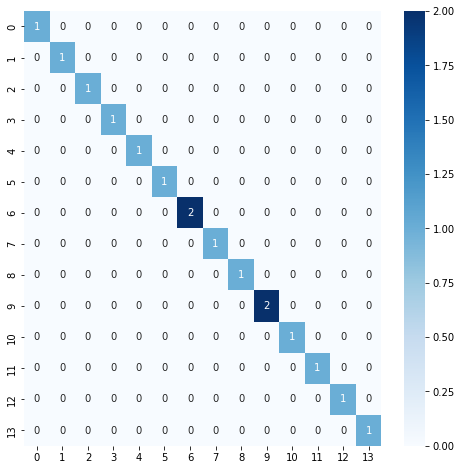

In [15]:
predictions = my_model.predict(test_images)
print(predictions.shape)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1) 

confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (8, 8))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(true_classes, predicted_classes))